# Assignment - 2, Gurram Manoj Reddy, 2nd question

## Training the Model to find the number of epochs after which the model will overfit

In [1]:
from tensorflow.keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [2]:
train_labels[0]

1

In [3]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j]=1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [6]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [8]:
model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
history = model.fit(partial_x_train,
                      partial_y_train,
                      epochs = 20,
                      batch_size = 512,
                      validation_data = (x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5340 - accuracy: 0.7746 - val_loss: 0.4195 - val_accuracy: 0.8506
Epoch 2/20
30/30 [==============================] - 0s 17ms/step - loss: 0.3349 - accuracy: 0.8936 - val_loss: 0.3196 - val_accuracy: 0.8854
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2418 - accuracy: 0.9243 - val_loss: 0.2866 - val_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1906 - accuracy: 0.9379 - val_loss: 0.2783 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1539 - accuracy: 0.9525 - val_loss: 0.2777 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1266 - accuracy: 0.9615 - val_loss: 0.2965 - val_accuracy: 0.8837
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1043 - accuracy: 0.9703 - val_loss: 0.3384 - val_accuracy: 0.8742
Epoch 8/20
30

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

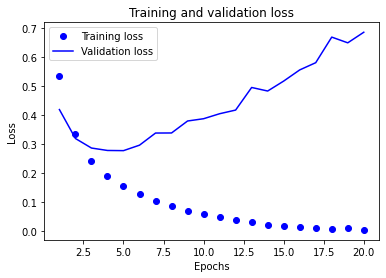

In [12]:
import matplotlib.pyplot as plt
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

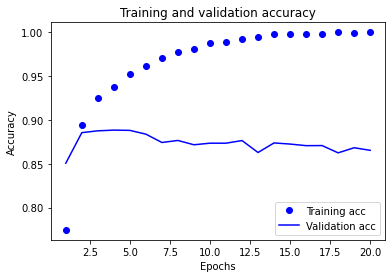

In [13]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### From above we can see that after 4 epochs model is being overfit

In [14]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.4329 - accuracy: 0.8260
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2537 - accuracy: 0.9068
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.1930 - accuracy: 0.9322
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2979 - accuracy: 0.8824


In [15]:
results

[0.29785290360450745, 0.8824399709701538]

In [16]:
model.predict(x_test)

array([[0.23363096],
       [0.9998697 ],
       [0.93635356],
       ...,
       [0.131771  ],
       [0.07277086],
       [0.74159765]], dtype=float32)

## Tuning the number of layers

In [17]:
model1 = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])
model2 = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])
model3 = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])
model4 = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])
model5 = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [18]:
model1.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])
model2.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])
model3.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])
model4.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])
model5.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [19]:
history1 = model1.fit(partial_x_train,
                      partial_y_train,
                      epochs = 5,
                      batch_size = 512,
                      validation_data = (x_val,y_val))
history2 = model2.fit(partial_x_train,
                      partial_y_train,
                      epochs = 5,
                      batch_size = 512,
                      validation_data = (x_val,y_val))
history3 = model3.fit(partial_x_train,
                      partial_y_train,
                      epochs = 5,
                      batch_size = 512,
                      validation_data = (x_val,y_val))
history4 = model4.fit(partial_x_train,
                      partial_y_train,
                      epochs = 5,
                      batch_size = 512,
                      validation_data = (x_val,y_val))
history5 = model5.fit(partial_x_train,
                      partial_y_train,
                      epochs = 5,
                      batch_size = 512,
                      validation_data = (x_val,y_val))

Epoch 1/5
30/30 [==============================] - 1s 33ms/step - loss: 0.4647 - accuracy: 0.7952 - val_loss: 0.3604 - val_accuracy: 0.8608
Epoch 2/5
30/30 [==============================] - 1s 23ms/step - loss: 0.2658 - accuracy: 0.9101 - val_loss: 0.2837 - val_accuracy: 0.8915
Epoch 3/5
30/30 [==============================] - 1s 25ms/step - loss: 0.2010 - accuracy: 0.9319 - val_loss: 0.2755 - val_accuracy: 0.8897
Epoch 4/5
30/30 [==============================] - 1s 24ms/step - loss: 0.1594 - accuracy: 0.9478 - val_loss: 0.3044 - val_accuracy: 0.8803
Epoch 5/5
30/30 [==============================] - 1s 24ms/step - loss: 0.1321 - accuracy: 0.9576 - val_loss: 0.2906 - val_accuracy: 0.8860
Epoch 1/5
30/30 [==============================] - 1s 32ms/step - loss: 0.4747 - accuracy: 0.7794 - val_loss: 0.3318 - val_accuracy: 0.8738
Epoch 2/5
30/30 [==============================] - 1s 25ms/step - loss: 0.2585 - accuracy: 0.9059 - val_loss: 0.3415 - val_accuracy: 0.8595
Epoch 3/5
30/30 [===

In [20]:
layers = [2,3,4,5,6]
results = [ model1.evaluate(x_test, y_test)[1],
              model2.evaluate(x_test, y_test)[1],
              model3.evaluate(x_test, y_test)[1],
              model4.evaluate(x_test, y_test)[1],
              model5.evaluate(x_test, y_test)[1] ]

782/782 [==============================] - 1s 2ms/step - loss: 0.4209 - accuracy: 0.8490


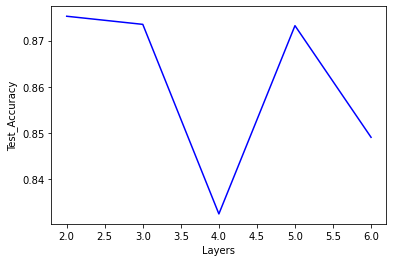

In [21]:
import matplotlib.pyplot as plt
plt.plot(layers, results, "b")
#plt.plot(epochs, val_loss_values, "b", label="Validation loss")
#plt.title("Training and validation loss")
plt.xlabel("Layers")
plt.ylabel("Test_Accuracy")
#plt.legend()
plt.show()

### From above we can see if it is 2 or 4 layers then we are getting highest accuracy

## Tuning the number of neurons in the model

In [22]:
from tensorflow import keras
from tensorflow.keras import layers
model11 = keras.Sequential([
    layers.Dense(16, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])
model6 = keras.Sequential([
    layers.Dense(32, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])
model7 = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])
model8 = keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])
model9 = keras.Sequential([
    layers.Dense(256, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])
model10 = keras.Sequential([
    layers.Dense(512, activation = 'relu'),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])
model6.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])
model7.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])
model8.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])
model9.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])
model10.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])
model11.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])
history6 = model6.fit(partial_x_train,
                      partial_y_train,
                      epochs = 5,
                      batch_size = 512,
                      validation_data = (x_val,y_val))
history7 = model7.fit(partial_x_train,
                      partial_y_train,
                      epochs = 5,
                      batch_size = 512,
                      validation_data = (x_val,y_val))
history8 = model8.fit(partial_x_train,
                      partial_y_train,
                      epochs = 5,
                      batch_size = 512,
                      validation_data = (x_val,y_val))
history9 = model9.fit(partial_x_train,
                      partial_y_train,
                      epochs = 5,
                      batch_size = 512,
                      validation_data = (x_val,y_val))
history10 = model10.fit(partial_x_train,
                      partial_y_train,
                      epochs = 5,
                      batch_size = 512,
                      validation_data = (x_val,y_val))
history11 = model11.fit(partial_x_train,
                      partial_y_train,
                      epochs = 5,
                      batch_size = 512,
                      validation_data = (x_val,y_val))

Epoch 1/5
30/30 [==============================] - 1s 28ms/step - loss: 0.4995 - accuracy: 0.7734 - val_loss: 0.3625 - val_accuracy: 0.8665
Epoch 2/5
30/30 [==============================] - 1s 19ms/step - loss: 0.2833 - accuracy: 0.8998 - val_loss: 0.2857 - val_accuracy: 0.8894
Epoch 3/5
30/30 [==============================] - 1s 21ms/step - loss: 0.2035 - accuracy: 0.9285 - val_loss: 0.2773 - val_accuracy: 0.8884
Epoch 4/5
30/30 [==============================] - 1s 22ms/step - loss: 0.1558 - accuracy: 0.9494 - val_loss: 0.2881 - val_accuracy: 0.8850
Epoch 5/5
30/30 [==============================] - 1s 25ms/step - loss: 0.1237 - accuracy: 0.9597 - val_loss: 0.2935 - val_accuracy: 0.8875
Epoch 1/5
30/30 [==============================] - 2s 32ms/step - loss: 0.4852 - accuracy: 0.7816 - val_loss: 0.3634 - val_accuracy: 0.8552
Epoch 2/5
30/30 [==============================] - 1s 28ms/step - loss: 0.2678 - accuracy: 0.8997 - val_loss: 0.2772 - val_accuracy: 0.8904
Epoch 3/5
30/30 [===

In [23]:
size = [16,32,64,128,256,512]
results1 = [  model11.evaluate(x_test, y_test)[1],
              model6.evaluate(x_test, y_test)[1],
              model7.evaluate(x_test, y_test)[1],
              model8.evaluate(x_test, y_test)[1],
              model9.evaluate(x_test, y_test)[1],
              model10.evaluate(x_test, y_test)[1] ]

782/782 [==============================] - 4s 5ms/step - loss: 0.3366 - accuracy: 0.8765


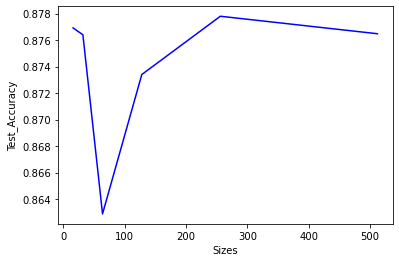

In [24]:
import matplotlib.pyplot as plt
plt.plot(size, results1, "b")
#plt.plot(epochs, val_loss_values, "b", label="Validation loss")
#plt.title("Training and validation loss")
plt.xlabel("Sizes")
plt.ylabel("Test_Accuracy")
#plt.legend()
plt.show()

### For 16 neurons we are getting highest accuracy

## Tuning the Optimizers in the model

In [25]:
model12 = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])
model13 = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])
model14 = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])
model15 = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])
model12.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])
model13.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])
model14.compile(optimizer = "sgd",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])
model15.compile(optimizer = "adagrad",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])
history12 = model12.fit(partial_x_train,
                      partial_y_train,
                      epochs = 5,
                      batch_size = 512,
                      validation_data = (x_val,y_val))
history13 = model13.fit(partial_x_train,
                      partial_y_train,
                      epochs = 5,
                      batch_size = 512,
                      validation_data = (x_val,y_val))
history14 = model14.fit(partial_x_train,
                      partial_y_train,
                      epochs = 5,
                      batch_size = 512,
                      validation_data = (x_val,y_val))
history15 = model15.fit(partial_x_train,
                      partial_y_train,
                      epochs = 5,
                      batch_size = 512,
                      validation_data = (x_val,y_val))

Epoch 1/5
30/30 [==============================] - 2s 34ms/step - loss: 0.4936 - accuracy: 0.7637 - val_loss: 0.3212 - val_accuracy: 0.8799
Epoch 2/5
30/30 [==============================] - 1s 25ms/step - loss: 0.2668 - accuracy: 0.8980 - val_loss: 0.2784 - val_accuracy: 0.8896
Epoch 3/5
30/30 [==============================] - 1s 24ms/step - loss: 0.1947 - accuracy: 0.9284 - val_loss: 0.3848 - val_accuracy: 0.8502
Epoch 4/5
30/30 [==============================] - 1s 24ms/step - loss: 0.1433 - accuracy: 0.9493 - val_loss: 0.3111 - val_accuracy: 0.8840
Epoch 5/5
30/30 [==============================] - 1s 24ms/step - loss: 0.1118 - accuracy: 0.9659 - val_loss: 0.3480 - val_accuracy: 0.8843
Epoch 1/5
30/30 [==============================] - 1s 30ms/step - loss: 0.4509 - accuracy: 0.8073 - val_loss: 0.2832 - val_accuracy: 0.8850
Epoch 2/5
30/30 [==============================] - 1s 23ms/step - loss: 0.1879 - accuracy: 0.9304 - val_loss: 0.3018 - val_accuracy: 0.8844
Epoch 3/5
30/30 [===

782/782 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5176


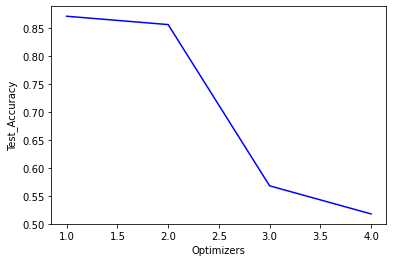

In [26]:
Optimizers = [1,2,3,4]
results2 = [  model12.evaluate(x_test, y_test)[1],
              model13.evaluate(x_test, y_test)[1],
              model14.evaluate(x_test, y_test)[1],
              model15.evaluate(x_test, y_test)[1]]
import matplotlib.pyplot as plt
plt.plot(Optimizers, results2, "b")
#plt.plot(epochs, val_loss_values, "b", label="Validation loss")
#plt.title("Training and validation loss")
plt.xlabel("Optimizers")
plt.ylabel("Test_Accuracy")
#plt.legend()
plt.show()

### We are having highest accuracy for RMSprop optimizer

## Tuning the Learning_rate of the model

In [29]:
from tensorflow.keras.optimizers import RMSprop

model20 = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])
model21 = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])
model22 = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])
model23 = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

optimizer1 = RMSprop(learning_rate=1)
optimizer2 = RMSprop(learning_rate=0.1)
optimizer3 = RMSprop(learning_rate=0.01)
optimizer4 = RMSprop(learning_rate=0.001)

model20.compile(optimizer = optimizer1,
              loss = "binary_crossentropy",
              metrics = ["accuracy"])
model21.compile(optimizer =  optimizer2,
              loss = "binary_crossentropy",
              metrics = ["accuracy"])
model22.compile(optimizer =  optimizer3,
              loss = "binary_crossentropy",
              metrics = ["accuracy"])
model23.compile(optimizer = optimizer4,
              loss = "binary_crossentropy",
              metrics = ["accuracy"])
history20 = model20.fit(partial_x_train,
                      partial_y_train,
                      epochs = 5,
                      batch_size = 128,
                      validation_data = (x_val,y_val))
history21 = model21.fit(partial_x_train,
                      partial_y_train,
                      epochs = 5,
                      batch_size = 128,
                      validation_data = (x_val,y_val))
history22 = model22.fit(partial_x_train,
                      partial_y_train,
                      epochs = 5,
                      batch_size = 128,
                      validation_data = (x_val,y_val))
history23 = model23.fit(partial_x_train,
                      partial_y_train,
                      epochs = 5,
                      batch_size = 128,
                      validation_data = (x_val,y_val))

Epoch 1/5
118/118 [==============================] - 2s 15ms/step - loss: 585910.1875 - accuracy: 0.5314 - val_loss: 25.7424 - val_accuracy: 0.5054
Epoch 2/5
118/118 [==============================] - 1s 12ms/step - loss: 1266.3450 - accuracy: 0.5043 - val_loss: 0.7347 - val_accuracy: 0.4947
Epoch 3/5
118/118 [==============================] - 1s 13ms/step - loss: 161.3950 - accuracy: 0.5055 - val_loss: 0.7690 - val_accuracy: 0.5053
Epoch 4/5
118/118 [==============================] - 2s 14ms/step - loss: 37.4111 - accuracy: 0.4971 - val_loss: 0.7241 - val_accuracy: 0.4947
Epoch 5/5
118/118 [==============================] - 1s 12ms/step - loss: 2.2362 - accuracy: 0.4996 - val_loss: 0.8080 - val_accuracy: 0.4947
Epoch 1/5
118/118 [==============================] - 2s 14ms/step - loss: 80.7205 - accuracy: 0.6346 - val_loss: 0.7644 - val_accuracy: 0.5088
Epoch 2/5
118/118 [==============================] - 2s 13ms/step - loss: 0.8357 - accuracy: 0.6214 - val_loss: 1.0920 - val_accuracy: 

782/782 [==============================] - 1s 2ms/step - loss: 0.7256 - accuracy: 0.8590


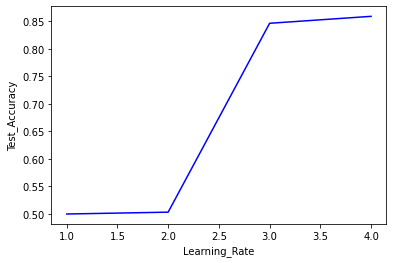

In [30]:
Learning_Rate = [1,2,3,4]
results4 = [  model20.evaluate(x_test, y_test)[1],
              model21.evaluate(x_test, y_test)[1],
              model22.evaluate(x_test, y_test)[1],
              model23.evaluate(x_test, y_test)[1]]
import matplotlib.pyplot as plt
plt.plot(Learning_Rate, results4, "b")
#plt.plot(epochs, val_loss_values, "b", label="Validation loss")
#plt.title("Training and validation loss")
plt.xlabel("Learning_Rate")
plt.ylabel("Test_Accuracy")
#plt.legend()
plt.show()

### For 0.01 Learning_rate we are having highest accuracy

# Final Model including all the tuned parameters

In [ ]:
### Tuned parameters are 16 neurons, 4 layers, 0.01 learning_rate, RMSprop Optimizer

In [43]:
from tensorflow.keras.optimizers import RMSprop

from tensorflow import keras
from tensorflow.keras import layers
Final_model = keras.Sequential([
    layers.Dense(16, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

Final_model.compile(optimizer = RMSprop(learning_rate=0.01),
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

history = Final_model.fit(partial_x_train,
                      partial_y_train,
                      epochs = 4,
                      batch_size = 512,
                      validation_data = (x_val,y_val))

Epoch 1/4
30/30 [==============================] - 1s 26ms/step - loss: 0.6055 - accuracy: 0.7120 - val_loss: 0.4867 - val_accuracy: 0.7779
Epoch 2/4
30/30 [==============================] - 1s 17ms/step - loss: 0.2848 - accuracy: 0.8857 - val_loss: 0.2737 - val_accuracy: 0.8912
Epoch 3/4
30/30 [==============================] - 1s 21ms/step - loss: 0.2011 - accuracy: 0.9189 - val_loss: 0.3647 - val_accuracy: 0.8604
Epoch 4/4
30/30 [==============================] - 0s 16ms/step - loss: 0.1513 - accuracy: 0.9375 - val_loss: 0.3327 - val_accuracy: 0.8863


In [44]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

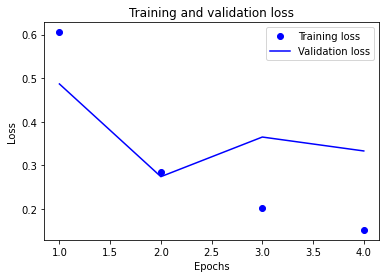

In [45]:
import matplotlib.pyplot as plt
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [46]:
from tensorflow.keras.optimizers import RMSprop

from tensorflow import keras
from tensorflow.keras import layers
Final_model = keras.Sequential([
    layers.Dense(16, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

Final_model.compile(optimizer = RMSprop(learning_rate=0.01),
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

Final_model.fit(x_train, y_train, epochs=4, batch_size=512)
results = Final_model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.4623 - accuracy: 0.7878
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2505 - accuracy: 0.8949
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1843 - accuracy: 0.9254
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3850 - accuracy: 0.8768


In [47]:
results

[0.38504648208618164, 0.876800000667572]

### FinalModel Testing accuracy is 87.68